In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
import random
from itertools import combinations
import plotly.express as px
import ast
import pm4py
from pandas.plotting import scatter_matrix

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import KNNImputer

import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

### Sex Bias in Berkeley Graduate Admissions?

In the Fall of 1973, the University of California at Berkeley released data about their graduate class. The data showed the major the applicant applied to, their self-reported gender (Male or Female), and whether or not they were accepted or rejected. The acceptance rates between men and women were different. This caused immediate concern in the public as people thought that Berkeley was biased against women.

The "Berkeley Dataset" contains all 12,763 applicants to UC-Berkeley's graduate programs in Fall 1973. This dataset was published by UC-Berkeley researchers in an analysis to understand the possible gender bias in admissions.

Dataset Variables:

Year : number ➜ The application year (this value is always 1973)

Major : string ➜: An anonymized major code (either A, B, C, D, E, F, or Other). The specific majors are unknown except that A-F are the six majors with the most applicants in Fall 1973

Gender : string ➜ Applicant self-reported gender (either M or F)

Admission: string ➜ Admission decision (either Rejected or Accepted)

In [3]:
UCB_data = pd.read_csv('datasets/berkeley.csv')
UCB_data.head()

,Year,Major,Gender,Admission
0,1973,C,F,Rejected
1,1973,B,M,Accepted
2,1973,Other,F,Accepted
3,1973,Other,M,Accepted
4,1973,Other,M,Rejected


Remove the "Year" column as it does not contain any information in this dataset (all years are 1973.)

In [4]:
UCB_data = UCB_data.drop(['Year'], axis = 1)
UCB_data.head()

,Major,Gender,Admission
0,C,F,Rejected
1,B,M,Accepted
2,Other,F,Accepted
3,Other,M,Accepted
4,Other,M,Rejected


 For each of the values of column "Gender", we compute the admission rate and compare them against each other.

In [5]:
UCB_byGender = UCB_data.groupby('Gender').Admission.value_counts().to_frame(name = 'Count').reset_index()
UCB_byGender

,Gender,Admission,Count
0,F,Rejected,2827
1,F,Accepted,1494
2,M,Rejected,4704
3,M,Accepted,3738


In [6]:
total_female_applying = UCB_byGender.iloc[:2, -1].sum()
total_male_applying = UCB_byGender.iloc[2:4, -1].sum()
rate_female_admit = UCB_byGender.iloc[1, -1] / total_female_applying
rate_male_admit = UCB_byGender.iloc[3, -1] / total_male_applying

In [7]:
print('Total number of Females applying: ',total_female_applying)
print('Total number of Males applying: ',total_male_applying)
print('\nAdmission Rate for Females: ', rate_female_admit)
print('Admission Rate for Males: ', rate_male_admit)

Total number of Females applying:  4321
Total number of Males applying:  8442

Admission Rate for Females:  0.3457532978477204
Admission Rate for Males:  0.4427860696517413


<Axes: xlabel='Admission', ylabel='Count'>

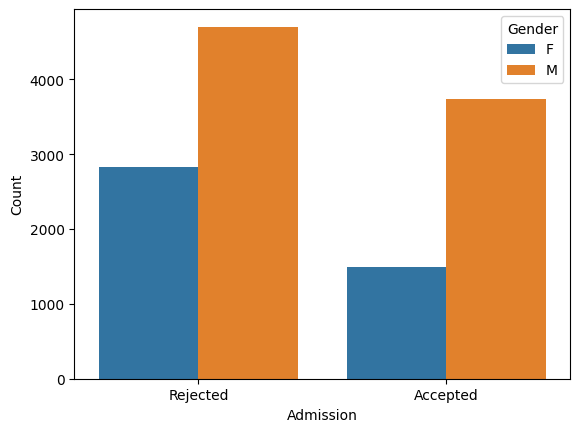

In [8]:
sns.barplot(data = UCB_byGender, x = 'Admission', y = 'Count', hue = 'Gender')

<font color='green'>=> From the data and illustration we can deduce that males had higher admission rates than females for Fall 73' semester. We should notice that the rejection rate of males is also higher than the rejection count of females since the number of males that have applied are also nearly double to that of females.</font>

 For each value combination of the "Gender" and "Major" columns, compute the admission rate. We compare the admission rate of women against the admission rate of men for each of the majors.

In [9]:
UCB_data["Admit"] = UCB_data.apply(lambda x: 1 if x["Admission"] == "Accepted" else 0, axis=1)
gen_admit_rates = UCB_data.groupby(["Major", "Gender"])["Admit"].mean()
gen_admit_rates = gen_admit_rates.reset_index()

In [10]:
gen_admit_rates

,Major,Gender,Admit
0,A,F,0.824074
1,A,M,0.724956
2,B,F,0.680000
3,B,M,0.630357
4,C,F,0.338954
5,C,M,0.369231
6,D,F,0.349333
7,D,M,0.330935
8,E,F,0.239186
9,E,M,0.277487


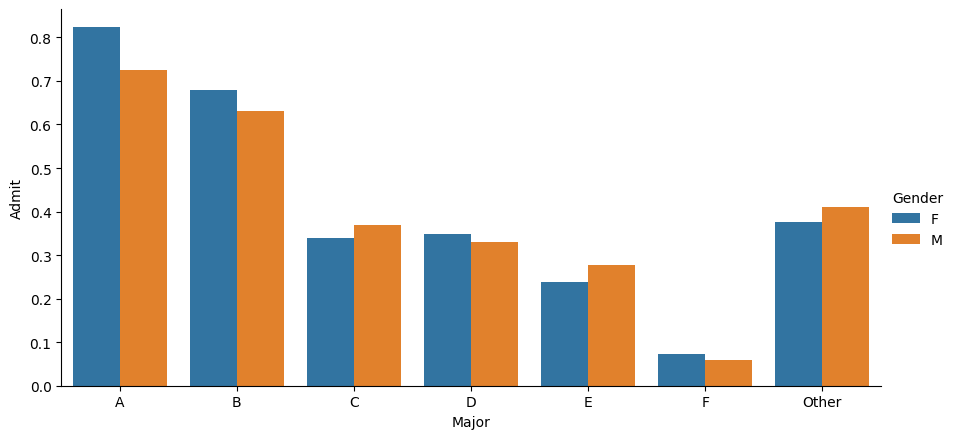

In [11]:
sns.catplot(x="Major", y="Admit", hue="Gender", kind="bar", data=gen_admit_rates, height=4.5, aspect=2)
plt.xlabel("Major")
plt.ylabel("Admit")
plt.show()

 Can we confirm there is a sex bias in the admission rates of the students?

<font color='green'>=> The graph above clearly indicates that there is no sex bias in the admission rates of student in UCB for Fall 73' semester. In the majors with most applicant i.e `A-F` as well as `Other` we see that the admit rate of women and men is fairly comparable and for each subject, the admission rate differs for male and female.</font>